## Task 3.5 ##

Задана таблица приближенных значений функции
$$ y(x) = a + bx + cx^2 $$
С помощью МНК определить коэффициенты a, b, c.

| x    | y |
| --------| ------- |
| -3 | -10 |
| -2 | -5 |
| -1 | -2 |
| 0 | 0 |
| 1 | 2 |
| 2 | 5 |
| 3 | 10 |

Для этого необходимо составить и решить следуюшую систему уравнений


In [6]:
from IPython.display import Image

# get the image
Image(url="../pics/Screenshot from 2024-11-05 00-29-06.png", width=500, height=300)

In [7]:
def calc_mnk_mx(data, pow):
    mx = []
    for i in range (pow + 1):
        row = []
        for j in range (i, i + pow + 1):
            sum = 0
            for k in range (len(data[0])):
                sum += data[0][k]**j
            row.append(sum)
        mx.append(row[::-1])
    return mx


def calc_b_col(data, pow):
    res = []
    for i in range(pow + 1):
        sum = 0
        for j in range((len(data[0]))):
            sum += data[1][j] * data[0][j]**i
            # print(sum)
        res.append(sum)
    return res

def find_coef_mnk(data, pow):
    b = calc_b_col(data, pow)
    A = calc_mnk_mx(data, pow)
    print ("b: ", calc_b_col(data, pow))
    print ("A: ", calc_mnk_mx(data, pow))
    return np.linalg.solve(A, b)[::-1]

In [8]:
def plot_res(data, coef):
    plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
    plt.grid(visible=True, linewidth=0.6)

    plt.xlim(xmin=-4, xmax=4 )
    plt.ylim(ymin=-15, ymax=15 )
    plt.tick_params(axis='both', which='major', labelsize=16, size=10)
    plt.grid(visible=True, linewidth=0.6)

    plt.errorbar(
        data[0], data[1],
        fmt='D',
        linewidth=1,
        markersize=5,
        elinewidth=1,
        color='red',
        label = '',
        capsize=4
    )

    z = np.polyfit(data[0], data[1], deg=2)
    polynom_1 = np.poly1d(coef)
    print(polynom_1)
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, polynom_1(x),"k--", linewidth=1, label = '$y = A_1x^2 + A_2x + c$')

    plt.legend(fontsize=18, markerscale = 2)
    plt.title ('\n Analyzing result'  , size = 19)
    plot_1.savefig('../pics/third.png')

b:  [0, 84, 0]
A:  [[28, 0, 7], [0, 28, 0], [196, 0, 28]]
 
3 x


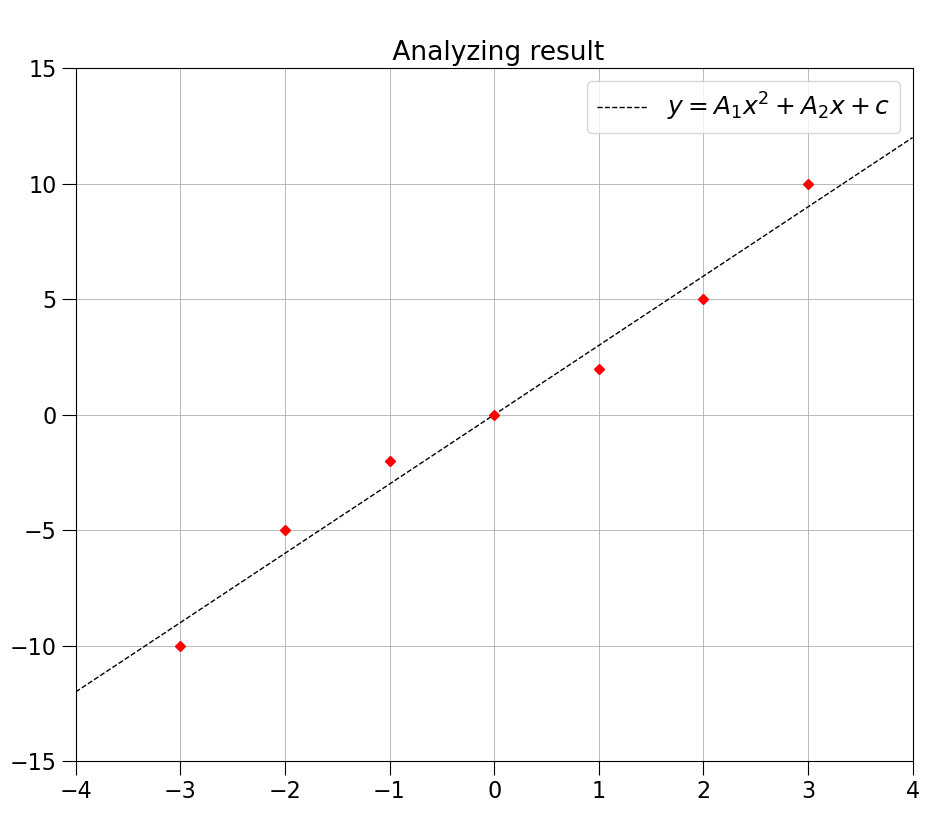

In [9]:
data = [[-3, -2, -1, 0, 1, 2, 3], [-10, -5, -2, 0 , 2, 5 ,10]]

plot_res(data, find_coef_mnk(data, 2))

###  Полученный результат: ###
$$f(x) = 0 \cdot x^2 + 3x + 0  = 3x$$

## Task 5.12 ##

В данной задаче нам предлагалось решить уравнение 
$$0.001 x^5 + 1 x^2 - 1 = 0$$

Двумя способами:

$\textbf{- Методом биссекции}$ c $\varepsilon = 0.1$

$\textbf{- Методом Ньютона}$ c $\varepsilon = 0.0000001$

In [10]:
def plot_pol(coef):
    plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
    plt.grid(visible=True, linewidth=0.6)

    plt.xlim(xmin=-10, xmax=10)
    plt.ylim(ymin=-15, ymax=15)
    plt.tick_params(axis='both', which='major', labelsize=16, size=10)
    plt.grid(visible=True, linewidth=0.6)

    polynom_1 = np.poly1d(coef)
    print(polynom_1)
    x = np.linspace(-1000, 1000, 100000)
    plt.plot(x, polynom_1(x),"k--", linewidth=1, label = '$y = f(x)$')

    plt.legend(fontsize=18, markerscale = 2)
    plt.title ('\n Predict'  , size = 19)
    plot_1.savefig('../pics/fourth.png')

Для этого первым шагом строим график нашей функции, чтобы определить, в окрестности каких точек нам необходимо искать решение
Получаем следующие отрезки для поиска
$$x_1 \in [0, 10]$$  
$$x_2 \in [-20, -5]$$
$$x_3 \in [-5, 0]$$  

       5     2
0.001 x + 1 x - 1


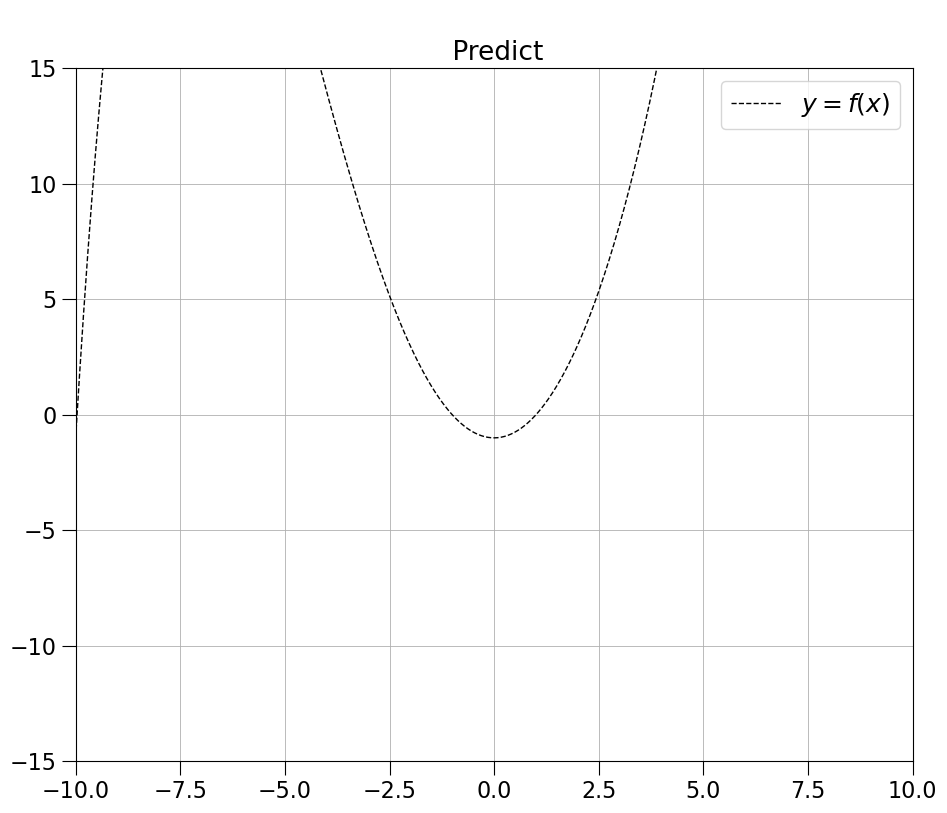

In [11]:
coef = [0.001, 0, 0, 1, 0, -1]
plot_pol(coef)

## Методом биссекции ##
Основная суть даннго метода заключается в том, что мы делим отрезок нашего поиска пополам и когда он становится меньше заданного $\varepsilon$ выходим из цикла

In [12]:
def split_seg_root(coef, seg, eps):
    pol = np.poly1d(coef)
    while True:
        val = seg[0] + (seg[1] - seg[0]) / 2
        if (np.abs(seg[0] - seg[1]) < np.abs(eps)):
            return val
        elif (pol(seg[1]) * pol(val) > 0):
            seg[1] = val
        else:
            seg[0] = val

In [13]:

b_r = np.array([split_seg_root(coef, [-20, -5], 0.1),
        split_seg_root(coef, [-5, 0]  ,  0.1),
        split_seg_root(coef, [0, 10]  ,  0.1)])


## Методом Ньютона ##
Основная суть даннго метода заключается в  следующей итерации

$$x_{n+1} = x_n + \frac{f(x_n)}{f`(x_{n})}$$

In [14]:
def my_diff(pol):
    res = []
    for i in range(len(pol) - 1):
        res.append((len(pol) - 1 - i) * pol[i])
    return res

def newton_root(coef, seg, eps):
    diff = my_diff(coef)
    pol = np.poly1d(coef)
    diff_pol = np.poly1d(diff)

    x = seg[0] + (seg[1] - seg[0]) / 2
    while True:
        if (np.abs(pol(x)) < np.abs(eps)):
            return x
        else:
            x = x - pol(x) / diff_pol(x)


In [15]:
n_r = np.array([newton_root(coef, [-20, -5], 0.0000001),
newton_root(coef, [-5, 0], 0.0000001),
newton_root(coef, [0, 10], 0.0000001)])

In [16]:
r = np.roots(coef)
# print(r[np.isreal(r)])

In [17]:

print("Bissection: ", b_r)
print("Newton:     ", n_r)
print("Numpy:      ", r[np.isreal(r)])

Bissection:  [-9.95117188 -0.9765625   0.9765625 ]
Newton:      [-9.96632779 -1.00050113  0.99950112]
Numpy:       [-9.96632779+0.j -1.00050113+0.j  0.99950112+0.j]


### Сравним наши решения с рефференсным, полученным в нампай ###


In [18]:
print("Bissection: ", np.abs(b_r - r[np.isreal(r)]))
print("Newton:     ", np.abs(n_r - r[np.isreal(r)]))

Bissection:  [0.01515592 0.02393863 0.02293862]
Newton:      [7.69260211e-10 1.42130752e-12 7.25386418e-10]
